# **Análisis exploratorio de datos**

El Análisis Exploratorio de Datos (EDA) tiene como objetivo principal comprender lo que los datos revelan y descubrir patrones o ideas dentro del conjunto de datos antes de proceder al modelado estadístico formal o a la formulación y prueba de hipótesis.

El análisis se organizará en estos puntos:

1. Análisis del problema.
2. Análisis univariable.
3. Análisis multivariable.
4. Limpieza de datos.
5. Comprobación de supuestos.
6. Construcción y evaluación del modelo de Regresión Lineal Múltiple






## Librerías necesarias.

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [340]:
house_df = pd.read_csv("Data/houseprices_train.csv")
house_df_test = pd.read_csv("Data/houseprices_test.csv")

In [343]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [344]:
print(f'Numero de samples de entrenamiento: {house_df.shape[0]}')
print(f'Numero de features de entrenamiento: {house_df.shape[1]-1}')
print(f'Numero de samples de test: {house_df_test.shape[0]}\n')
print(f'Entrenamiento X Shape: {house_df.shape}')
print(f'Entrenamiento Y shape: {house_df.shape[0]}\n')
print(f'Prueba X shape: {house_df_test.shape}')
print(f'Prueba Y shape: {house_df_test.shape[0]}\n')
print(house_df.columns)
print(house_df_test.columns)

Numero de samples de entrenamiento: 1460
Numero de features de entrenamiento: 80
Numero de samples de test: 1459

Entrenamiento X Shape: (1460, 81)
Entrenamiento Y shape: 1460

Prueba X shape: (1459, 80)
Prueba Y shape: 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr

# 1.Análisis del problema


Para asimilar verdaderamente la información contenida en el conjunto de datos, procederemos a examinar el significado y la importancia de cada característica en relación con el escenario planteado. Buscaremos responder preguntas fundamentales, tales como:

*   La influencia de la característica en el costo final de una propiedad.
*  Duplicidad de información con otras características.

La finalidad del proyecto es la estimación del valor de las propiedades inmobiliarias, por lo tanto, el factor principal a predecir es el Valor de la Vivienda.

¿Cual es nuestro target?

* La Variable Target de este proyecto es el Precio de las Propiedades ($Y$).
* El objetivo del Modelo de Regresión Lineal Múltiple (RLM) es predecir esta variable continua, utilizando las otras características del dataset (como tamaño, ubicación, número de habitaciones, etc.) como variables predictoras ($X_i$).

In [345]:
#El conjunto de datos inicial consta de 81 variables, pero para los fines de este análisis, nos enfocaremos únicamente en un subconjunto de 25 columnas seleccionadas.
variables_eliminar = [
'LandSlope', 'LotFrontage', 'LotShape', 'LandContour', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl',
'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageType',
'GarageYrBlt', 'GarageFinish', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
'ScreenPorch', 'Fence', 'MiscFeature', 'MiscVal', 'Street', 'Alley', 'LotConfig', 'Exterior1st', 'MasVnrType',
'ExterCond', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageCond', 'HalfBath', 'Fireplaces', 'GarageCars',
'WoodDeckSF', 'YearBuilt', 'OverallQual', 'Heating', 'MasVnrArea', 'Electrical', 'KitchenQual', 'GarageQual',
'MSSubClass']
house_df.drop(columns = variables_eliminar, axis = 1, inplace = True)

In [346]:
#Renombramiento de columnas
dict_renombre = {
'MSZoning':'Zonificacion', 'LotArea':'TamanioLote', 'Utilities':'ServiciosBasicos', 'Neighborhood':'Vecindario',
'BldgType':'TipoVivienda', 'HouseStyle':'EstiloVivienda', 'OverallCond':'EstadoCasa',
'YearRemodAdd':'FechaRemodelacion', 'Foundation':'TipoCimentacion', '1stFlrSF':'AreaPiso1', '2ndFlrSF':'AreaPiso2',
'GrLivArea':'SuperficieHabitable', 'FullBath':'Banios', 'BedroomAbvGr':'Dormitorios', 'KitchenAbvGr':'Cocinas',
'TotRmsAbvGrd':'Habitaciones', 'GarageArea':'AreaGaraje', 'PoolArea': 'AreaPiscina', 'PoolQC':'CalidadPiscina','MoSold':'MesVenta',
'YrSold':'AnioVenta', 'SaleType':'TipoVenta', 'SaleCondition':'CondicionVenta', 'SalePrice':'PrecioVenta'
}
house_df.rename(columns = dict_renombre, inplace = True)

In [347]:
house_df.head()

,Id,Zonificacion,TamanioLote,ServiciosBasicos,Vecindario,TipoVivienda,EstiloVivienda,EstadoCasa,FechaRemodelacion,TipoCimentacion,...,Cocinas,Habitaciones,AreaGaraje,AreaPiscina,CalidadPiscina,MesVenta,AnioVenta,TipoVenta,CondicionVenta,PrecioVenta
0,1,RL,8450,AllPub,CollgCr,1Fam,2Story,5,2003,PConc,...,1,8,548,0,NaN,2,2008,WD,Normal,208500
1,2,RL,9600,AllPub,Veenker,1Fam,1Story,8,1976,CBlock,...,1,6,460,0,NaN,5,2007,WD,Normal,181500
2,3,RL,11250,AllPub,CollgCr,1Fam,2Story,5,2002,PConc,...,1,6,608,0,NaN,9,2008,WD,Normal,223500
3,4,RL,9550,AllPub,Crawfor,1Fam,2Story,5,1970,BrkTil,...,1,7,642,0,NaN,2,2006,WD,Abnorml,140000
4,5,RL,14260,AllPub,NoRidge,1Fam,2Story,5,2000,PConc,...,1,9,836,0,NaN,12,2008,WD,Normal,250000


Separamos las variables independientes en variables cuantitativas y cualitativas

In [348]:
quantitative = house_df.select_dtypes(exclude = 'object').columns.to_list()
#PrecioVenta es la variable dependiente, por ello lo eliminamos de quantitative.
quantitative.remove('PrecioVenta')
#Id solo es un identificador del registro, por ello lo eliminamos quantitative.
quantitative.remove('Id')
qualitative = house_df.select_dtypes(include = 'object').columns.to_list()

# 2.Análisis univariable

In [349]:
# Resumen de la estadística descriptiva:
house_df['PrecioVenta'].describe()

,PrecioVenta
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


[]

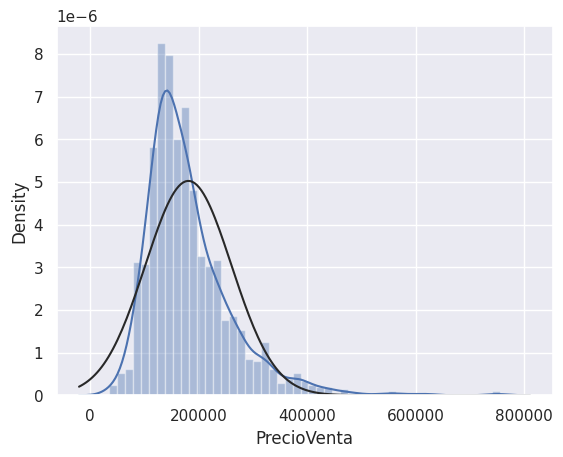

In [350]:
# Histograma de la distribución de los precios de las viviendas.
sns.distplot(house_df['PrecioVenta'], fit = norm)
plt.plot()

Al observar el gráfico, se pueden identificar inmediatamente las siguientes características:



*   Una discrepancia en comparación con la curva de distribución normal
*   Una cola extendida hacia la derecha (sesgo positivo).
*   La presencia de valores concentrados y prominentes (o modas).



In [351]:
# Asimetría y curtosis:
print("Skewness: %f" % house_df['PrecioVenta'].skew())
print("Kurtosis: %f" % house_df['PrecioVenta'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


La Curtosis es mayor que cero,  entonces la curva es leptocúrtica, por lo que hay mayor probabilidad de encontrar valores atípicos.

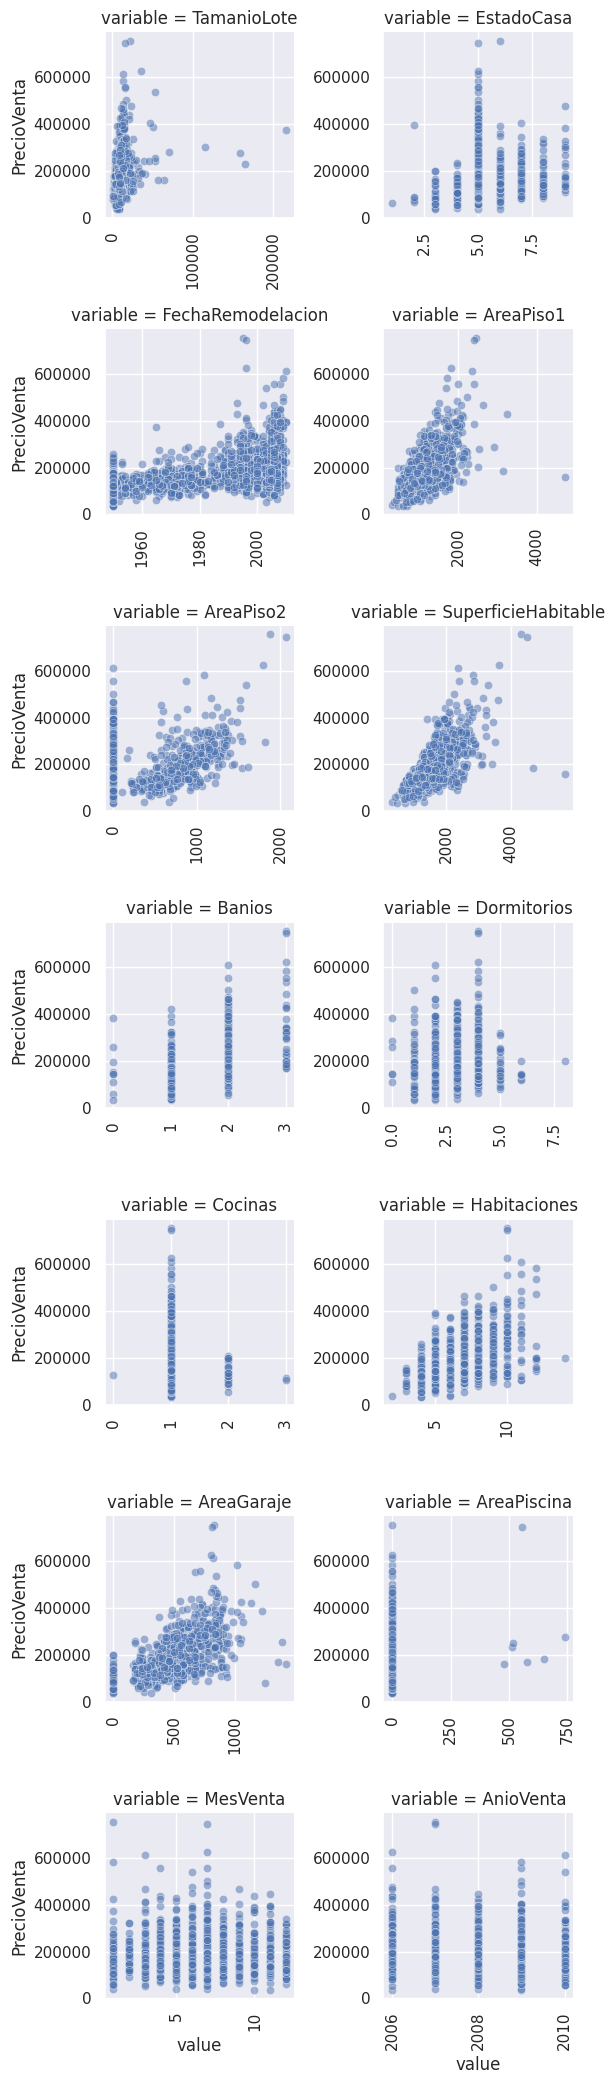

In [352]:
# Diagrama de dispersión
def scatterplot_func(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, alpha = 0.5)
    x=plt.xticks(rotation=90)

# Le aplicamos unpivot al dataframe por cada variable cuantitativa
f = pd.melt(frame = house_df, id_vars=['PrecioVenta'], value_vars=quantitative)
# Creamos las parcelas donde colocaremos nuestros gráficos
g = sns.FacetGrid(data = f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# Poblamos las parcelas con los gráficos
g = g.map(scatterplot_func, "value", "PrecioVenta")

Conclusión:

'AreaPiso1' y 'SuperficieHabitable' mantienen una relación lineal positiva con 'PrecioVenta', aumentando en el mismo sentido.

### Variables cualitativas

Con variables cualitativas podemos implementar dos métodos:  
1. Verificar la distribución de PrecioVenta con respecto a los valores de las variables y enumerarlos.
2. Crear una variable ficticia para cada categoría posible.

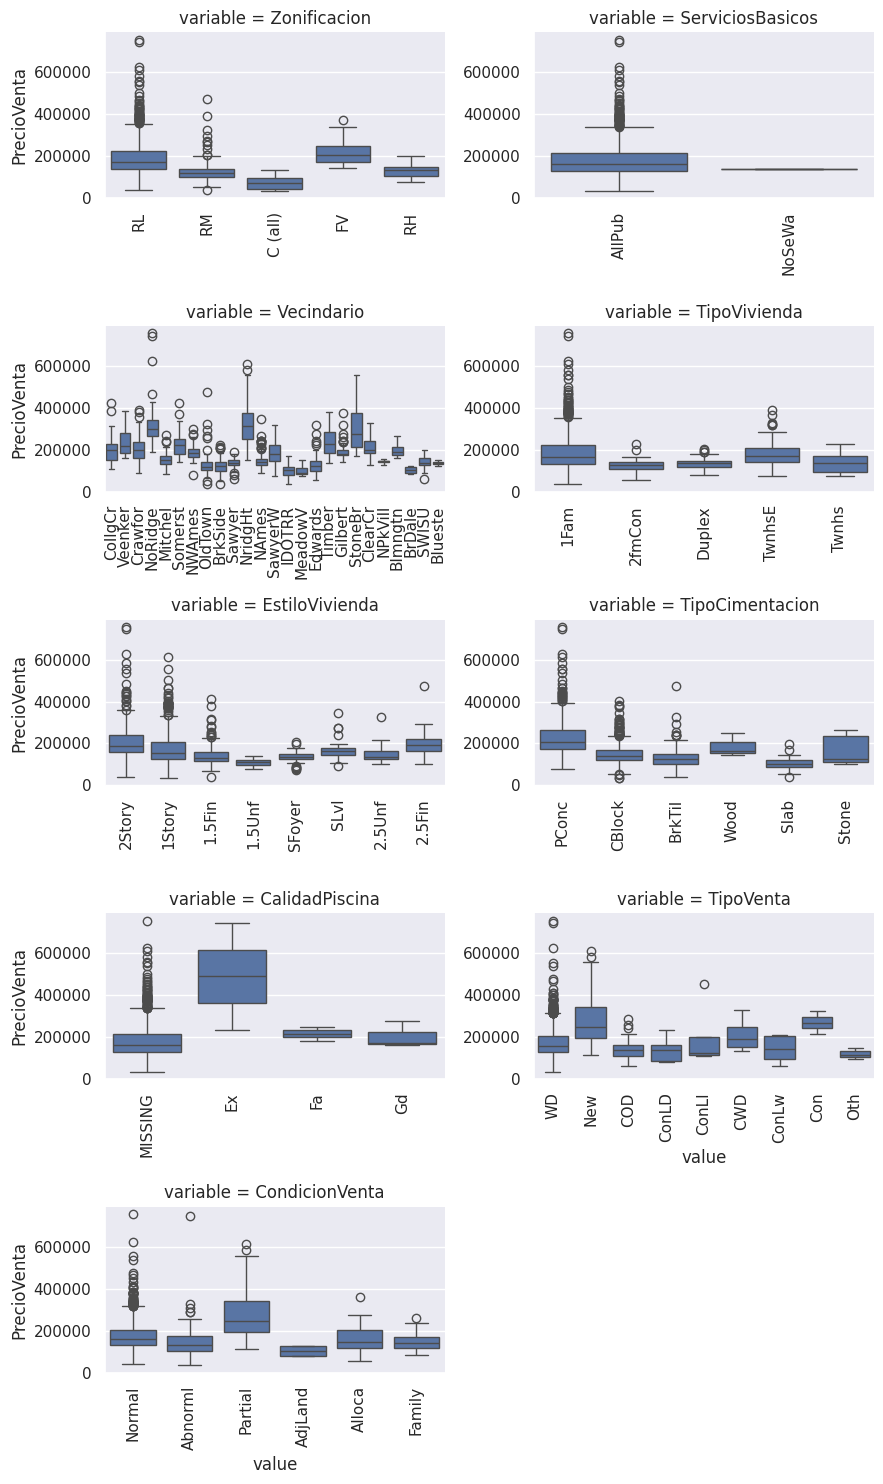

In [353]:
def variable_categorica(df, qualitative):
  for c in qualitative:
    #convertimos a categoría
    df[c] = df[c].astype('category')
    if(df[c].isnull().any()):
      #Aniadimos la categoría missing en caso existan valores nan
      df[c] = df[c].cat.add_categories(['MISSING'])
      df[c] = df[c].fillna('MISSING')
variable_categorica(house_df, qualitative)

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

# Le aplicamos unpivot al dataframe por cada variable cualitativa
f = pd.melt(house_df, id_vars=['PrecioVenta'], value_vars=qualitative)
# Creamos las parcelas donde colocaremos nuestros gráficos
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, aspect=1.5)
# Poblamos las parcelas con los gráficos
g = g.map(boxplot, "value", "PrecioVenta")

Conclusiones Reafirmadas

* La ubicación/zona ejerce una influencia significativa sobre la cotización de las propiedades inmobiliarias.


* La variable que indica una condición de venta parcial (incompleta) está asociada al valor más elevado.

* La inclusión de una piscina en la vivienda se correlaciona con un incremento sustancial en su valor de mercado.

* Se observan disparidades en la dispersión (o varianza) de los precios entre las distintas agrupaciones de categorías analizadas.

### Test ANOVA

¿El Vecindario tiene alguna repercusión en el precio?

* Hipótesis nula (H0): No hay diferencias significativas en los precios de venta entre los diferentes vecindarios
* Hipótesis alternativa (H1): Existen diferencias significativas en los precios de venta entre al menos dos vecindarios

In [354]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('PrecioVenta ~ Vecindario', data=house_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Vecindario,5.023606e+12,24.0,71.784865,1.558600e-225
Residual,4.184305e+12,1435.0,NaN,NaN


p-value < 0.05, por lo tanto se rechaza la hipótesis nula. Significa que hay evidencia suficiente para decir que al menos dos vecindarios tienen precios de venta diferentes.

### Encoding
Una forma de encodear es creando variables dummy(binarias).

In [355]:
house_df_dummies = pd.get_dummies(data = house_df, prefix_sep='_', columns=qualitative)

In [356]:
house_df["Zonificacion"].unique()

['RL', 'RM', 'C (all)', 'FV', 'RH']
Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']

In [357]:
palabra_buscar = "Zonificacion"
columnas_contiene_palabra = [col for col in house_df_dummies.columns.to_list() if palabra_buscar in col]
house_df_dummies[columnas_contiene_palabra].sample(5)

,Zonificacion_C (all),Zonificacion_FV,Zonificacion_RH,Zonificacion_RL,Zonificacion_RM
115,False,True,False,False,False
366,False,False,False,True,False
175,False,False,False,True,False
29,False,False,False,False,True
499,False,False,False,True,False


* Identificación del Patrón: Las categorías analizadas muestran una estructura inherentemente ordenada. Un caso claro es la característica "piscina", donde una vivienda con piscina establece una calidad o jerarquía superior respecto a una sin ella.

* Decisión de Modelado: Para capturar este orden y representarlo numéricamente, se implementará una técnica de codificación: transformaremos estas variables ordinales (o con orden implícito) asignando a cada categoría el valor de la media del precio de venta observada en dicha categoría.

In [358]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    #Guardamos los valores únicos de cada variable cualitativa
    ordering['ValoresUnicos'] = frame[feature].unique()
    #Los índices de nuestro df serán estas categorías
    ordering.index = ordering.ValoresUnicos
    #Hallamos la media del precio de venta por cada valor único de la variable categórica
    ordering['PrecioVentaMedia'] = frame[[feature, 'PrecioVenta']].groupby(feature).mean()['PrecioVenta']
    #Ordenamos nuestro df de acuerdo a la media del precio de venta
    ordering = ordering.sort_values('PrecioVentaMedia')
    #Asignamos un valor de orden a cada valor único
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()

    #Creamos nuestros campos encodeados en nuestro dataframe
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

#Guardamos los nombres de columnas encodeadas en una lista
qual_encoded = []
for q in qualitative:
    encode(house_df, q)
    qual_encoded.append(q+'_E')
#Mostramos los campos encodeados
print(qual_encoded)

['Zonificacion_E', 'ServiciosBasicos_E', 'Vecindario_E', 'TipoVivienda_E', 'EstiloVivienda_E', 'TipoCimentacion_E', 'CalidadPiscina_E', 'TipoVenta_E', 'CondicionVenta_E']


In [359]:
house_df[["TipoCimentacion", "TipoCimentacion_E"]].sample(5)

,TipoCimentacion,TipoCimentacion_E
947,PConc,6.0
704,PConc,6.0
43,CBlock,3.0
562,CBlock,3.0
1392,CBlock,3.0


# 3.Análisis multivariable

<Axes: >

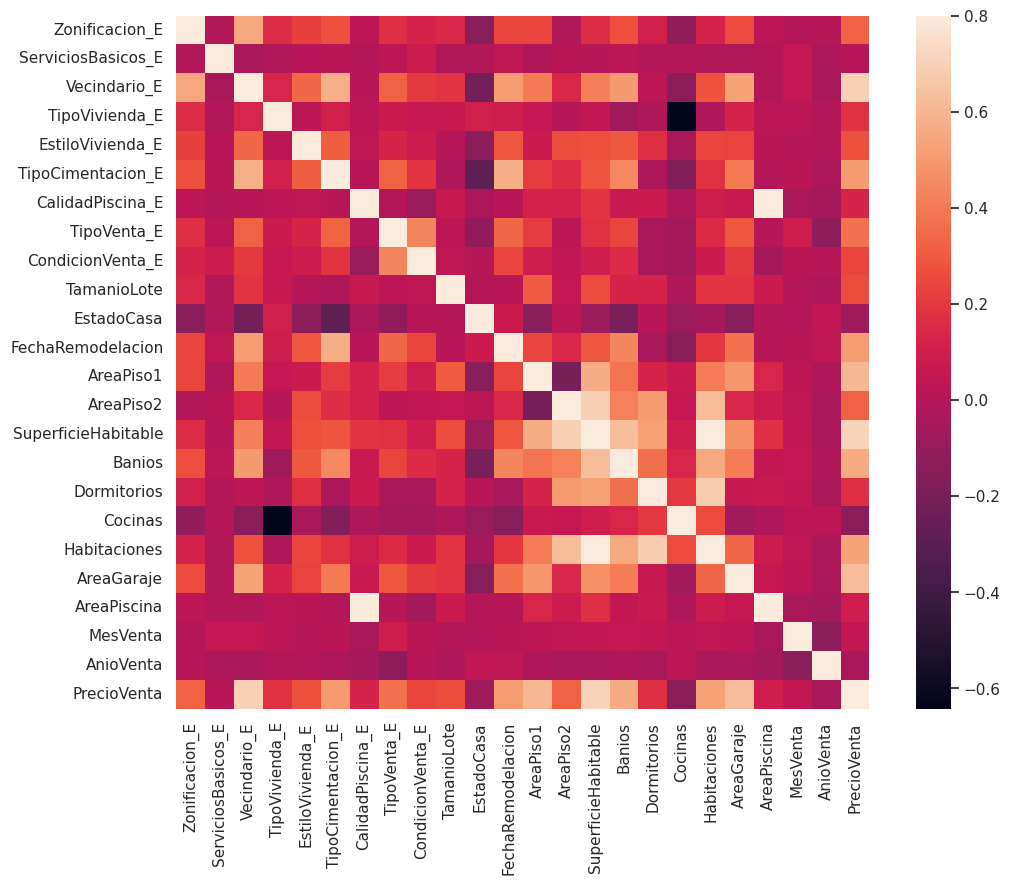

In [360]:
# Matriz de correlación:
corrmat = house_df[qual_encoded + quantitative + ["PrecioVenta"]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<Axes: >

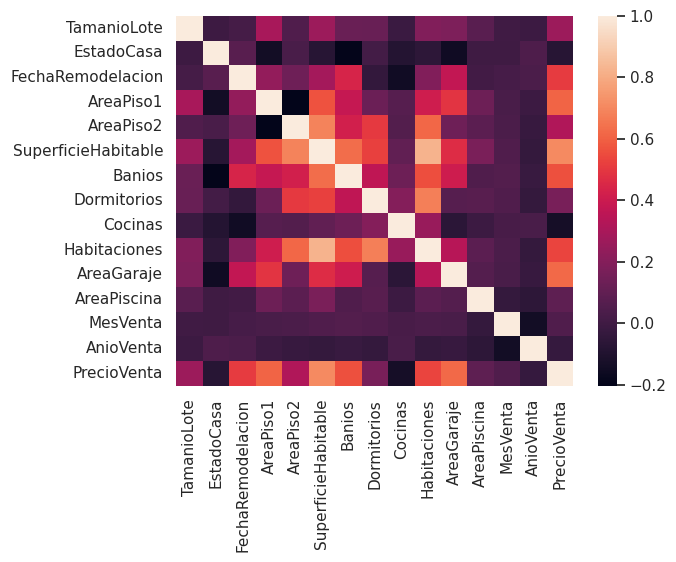

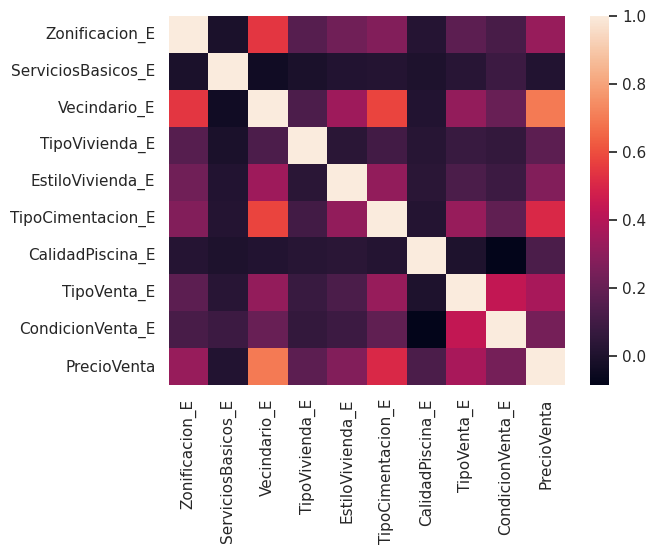

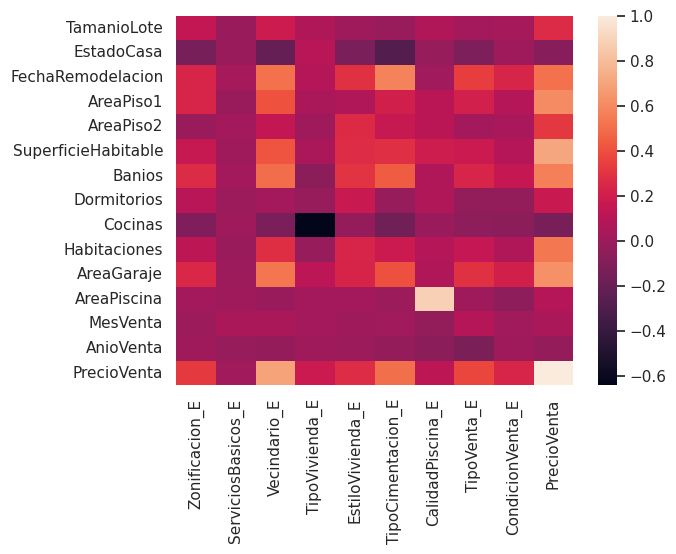

In [361]:
#El mismo diagrama pero por partes
sns.set(font_scale = 1.0)
plt.figure(1)
corr = house_df[quantitative+['PrecioVenta']].corr()
sns.heatmap(corr)

plt.figure(2)
corr = house_df[qual_encoded+['PrecioVenta']].corr()
sns.heatmap(corr)

plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]),
                    index=quantitative+['PrecioVenta'], columns=qual_encoded+['PrecioVenta'])
for q1 in quantitative+['PrecioVenta']:
    for q2 in qual_encoded+['PrecioVenta']:
        corr.loc[q1, q2] = house_df[q1].corr(house_df[q2])
sns.heatmap(corr)

## Matriz de correlación con la variable PrecioVenta

In [362]:
corr = house_df[quantitative + qual_encoded + ["PrecioVenta"]].corr()[['PrecioVenta']]
corr.sort_values(by = 'PrecioVenta',ascending = False).style.background_gradient()

,PrecioVenta
PrecioVenta,1.000000
SuperficieHabitable,0.708624
Vecindario_E,0.696882
AreaGaraje,0.623431
AreaPiso1,0.605852
Banios,0.560664
Habitaciones,0.533723
FechaRemodelacion,0.507101
TipoCimentacion_E,0.505503
TipoVenta_E,0.366821


**Conclusión**  
- Hay muchas correlaciones fuertes entre las variables.
- El vecindario se correlaciona con muchas otras variables y esto confirma la idea de que las casas en la misma región comparten las mismas características.
- El tipo de vivienda se correlaciona negativamente con el número de cocinas.
- 'Banios' también está correlacionada con 'PrecioVenta', 'Habitaciones' y 'SuperficieHabitable'. Tenemos **multicolinealidad**
- 'Habitaciones' y 'SuperficieHabitable', otro caso de **multicolinealidad**

### Multicolinealidad

* La fuerte relación entre las variables que usamos para predecir (variables predictoras) es un problema.

* Esta correlación excesiva tiene el potencial de inestabilizar nuestro modelo estadístico.

* Además, puede resultar en interpretaciones incorrectas o engañosas sobre la influencia real de cada variable en el resultado principal.

**¿Cómo detectar la multicolinealidad?**

Análisis VIF(Factor de influencia de varianza): Evalúa la medida en que cada variable independiente en un modelo está linealmente relacionada con las otras variables independientes.
Un VIF > 10 indica alta multicolinealidad.

In [363]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
# quantitative + qual_encoded
vif_data["feature"] = quantitative
vif_data["VIF"] = [variance_inflation_factor(house_df[quantitative].values, i)
                          for i in range(len(quantitative))]
vif_data

,feature,VIF
0,TamanioLote,2.394083
1,EstadoCasa,29.386846
2,FechaRemodelacion,14140.280685
3,AreaPiso1,678.165939
4,AreaPiso2,139.586756
5,SuperficieHabitable,1144.063779
6,Banios,19.292728
7,Dormitorios,28.208639
8,Cocinas,28.286353
9,Habitaciones,79.682724


In [364]:
columnas_seleccionadas = vif_data[vif_data.VIF <= 100].feature.tolist()
columnas_seleccionadas

['TamanioLote',
 'EstadoCasa',
 'Banios',
 'Dormitorios',
 'Cocinas',
 'Habitaciones',
 'AreaGaraje',
 'AreaPiscina',
 'MesVenta']

Se deben realizar algunas transformaciones a nuestros datos para reducir este efecto.

# 4.Limpieza de datos.


###  Datos faltantes
Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra.

In [365]:
# Missing data:
total = house_df.isnull().sum().sort_values(ascending = False)
percent = (house_df.isnull().sum() / house_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
Zonificacion,0,0.0
TamanioLote,0,0.0
ServiciosBasicos,0,0.0
Vecindario,0,0.0
TipoVivienda,0,0.0
EstiloVivienda,0,0.0
EstadoCasa,0,0.0
FechaRemodelacion,0,0.0
TipoCimentacion,0,0.0


In [366]:
missing = house_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
if missing.shape[0] > 0:
  missing.plot.bar()
else:
  print("No tenemos valores nulos.")

No tenemos valores nulos.


### Datos duplicados

In [367]:
house_df[house_df.duplicated()].shape

(0, 34)

In [368]:
house_df = house_df.drop_duplicates()
house_df.shape

(1460, 34)

**Conclusión**  
Nuestro dataset no tiene registros duplicados.

### Datos atípicos

In [369]:
from scipy import stats
import numpy as np

def outliers_col(df, columnas):
  for col in columnas:
    #Solo son outliers los que sobrepasan el z score de 3
    n_outliers = len(df[np.abs(stats.zscore(df[col])) > 3])
    print("{} | {}".format(df[col].name, n_outliers))
outliers_col(house_df, quantitative + ["PrecioVenta"])

TamanioLote | 13
EstadoCasa | 28
FechaRemodelacion | 0
AreaPiso1 | 12
AreaPiso2 | 4
SuperficieHabitable | 16
Banios | 0
Dormitorios | 14
Cocinas | 68
Habitaciones | 12
AreaGaraje | 7
AreaPiscina | 7
MesVenta | 0
AnioVenta | 0
PrecioVenta | 22


Debemos decidir qué hacer con estos Outliers. ¿Serán errores de registros o hechos perfectamente válidos?

**Conclusión**  
- Se han encontrado outliers en todas las variables, con excepción de las variables de fecha.

###Análisis bivariable

También podemos hacer un análisis de outliers de cada variable respecto a la
variable objetivo.

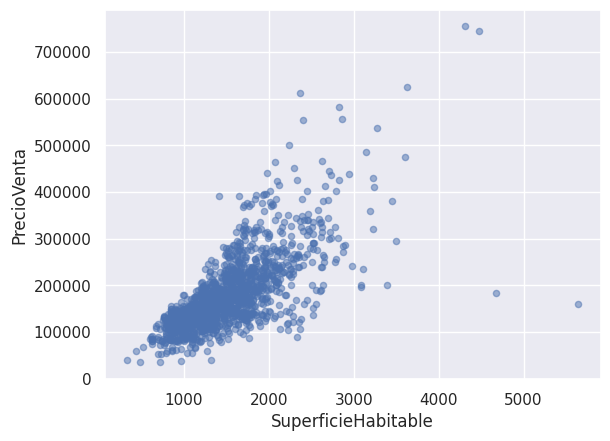

In [370]:
# Análisis bivariable PrecioVenta/SuperficieHabitable:
var = 'SuperficieHabitable'
house_df.plot.scatter(x = 'SuperficieHabitable', y = 'PrecioVenta', alpha = 0.5);

Tenemos dos valores de superficies habitables que distorsionan nuestros resultados, procedemos a eliminarlos.

In [371]:
ID_outlier = house_df.sort_values(by = 'SuperficieHabitable', ascending = False)[:2]["Id"].to_list()

In [372]:
# Eliminación de valores:
house_df = house_df.drop(house_df[house_df['Id'].isin(ID_outlier)].index)

<Axes: xlabel='SuperficieHabitable', ylabel='PrecioVenta'>

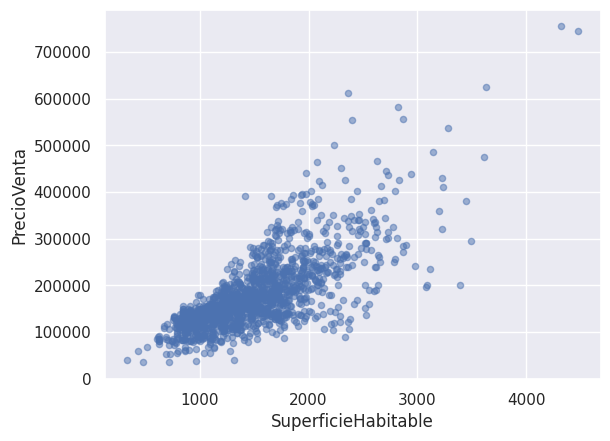

In [373]:
# Análisis bivariable SalePrice/SuperficieHabitable:
var = 'SuperficieHabitable'
house_df.plot.scatter(x = 'SuperficieHabitable', y = 'PrecioVenta', alpha = 0.5)

**Conclusión**  
- Se han eliminado 2 outliers de la superficie habitable ya que distorsionaban los resultados de nuestro análisis.

# 5.Comprobación de supuestos.

Hay que comprobar cuatro suposiciones fundamentales:

- Normalidad: Los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

- Homocedasticidad: Suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras. La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

- Linealidad: La forma más común de evaluar la linealidad es examinar los **diagramas de dispersión** y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos.

- Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo.

### Normalidad

El objetivo es estudiar la variable 'PrecioVenta' de forma fácil, comprobando:

- Histograma: Curtosis y asimetría.
- Gráfica de probabilidad normal: La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.
-Test de normalidad: Dos pruebas comunes son la Prueba de Shapiro-Wilk y la Prueba de Kolmogorov-Smirnov.


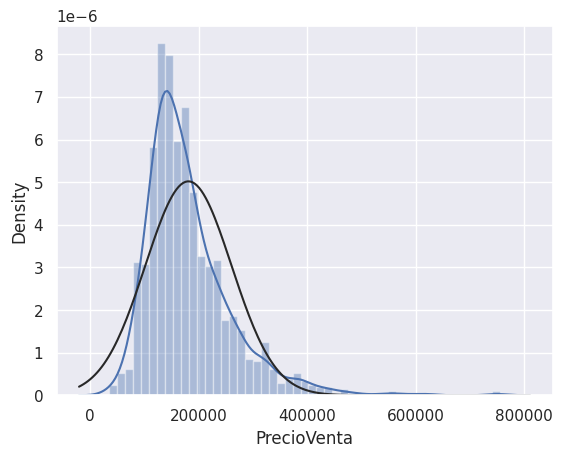

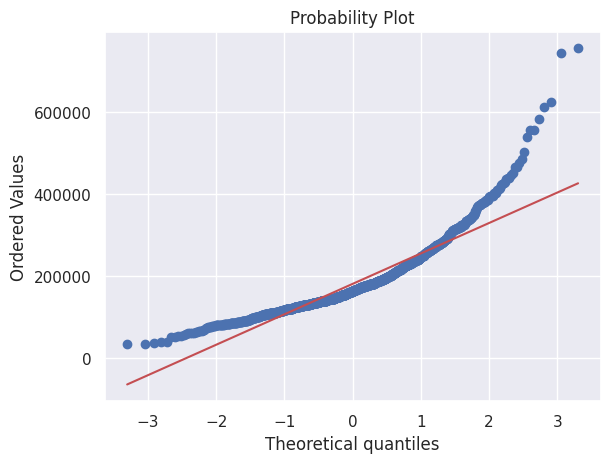

In [374]:
# Histograma y gráfico de probabilidad normal:
sns.distplot(house_df['PrecioVenta'], fit = norm)
fig = plt.figure()
res = stats.probplot(house_df['PrecioVenta'], plot = plt)

Parece que PrecioVenta no se ajusta a una distribución normal.

De estos gráficos se desprende que 'PrecioVenta' no tiene una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.

### Test de normalidad  

Los Test de normalidad se utilizan para verificar si una muestra de datos sigue una distribución normal. Dos de los tests más comunes son:
* Test de Shapiro-Wilk:

Es una prueba estadística utilizada para evaluar si una muestra de datos proviene de una distribución normal. Es adecuado para muestras de tamaño moderado($n < 30$). Se plantean las siguientes hipótesis:
  - Hipótesis nula ($H_0$): La muestra sigue una distribución normal.
  - Hipótesis alternativa ($H_1$): La muestra no sigue una distribución normal.
* Test de Kolmogorov-Smirnov:

Es una prueba no paramétrica que determina la **bondad de ajuste** de dos distribuciones de probabilidad entre sí. Es aplicable para muestras grandes.  Para una distribución normal se plantean las siguientes hipótesis:
  - Hipótesis nula ($H_0$): La muestra sigue una distribución normal.
  - Hipótesis alternativa ($H_1$): La muestra no sigue una distribución normal.


¿Los precios de venta se ajustan a una distribución normal?

[]

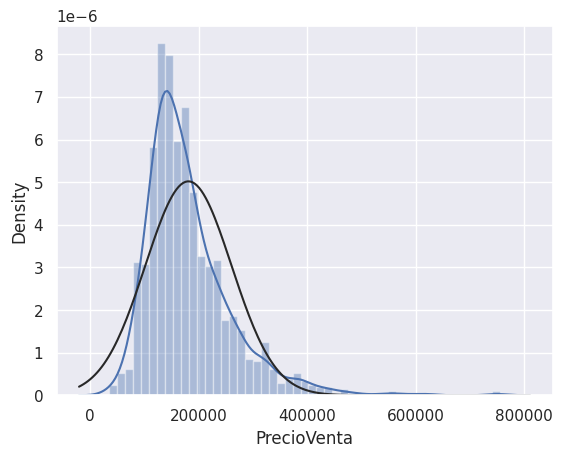

In [375]:
# Histograma
sns.distplot(house_df['PrecioVenta'], fit = norm)
plt.plot()

In [376]:
from scipy import stats
import numpy as np

stat_ks, p_value = sm.stats.diagnostic.kstest_normal(house_df["PrecioVenta"], dist = 'norm')
stat_ks, p_value

(np.float64(0.12332001874102394), np.float64(0.0009999999999998899))

p-value = 0.0009999999999998899 < 0.05, por lo tanto los precios de venta de las viviendas no siguen una distribución normal.

# Transformación Logarítmica: 'PrecioVenta'

La aplicación del logaritmo natural a la variable **'PrecioVenta'** es un paso fundamental que garantiza que nuestros modelos de predicción funcionen de forma correcta.

1.  **Normalización de la Distribución:** El precio de venta suele estar **fuertemente sesgado a la derecha** (distribución no normal). La función logarítmica actúa como un "compresor", reduciendo el peso de los valores atípicos altos y **acercando la distribución a la normalidad**. Esto es crucial para obtener residuos que se distribuyan de forma aleatoria.

2.  **Mejorar la Precisión y la Confianza:** Al corregir este sesgo, el modelo cumple con sus requisitos matemáticos. Esto se traduce en **predicciones más precisas y confiables** en todos los rangos de precios, ya que el modelo confía en la calidad de la variable objetivo ('PrecioVenta').

In [377]:
# Transformación de los datos:
house_df['PrecioVenta'] = np.log(house_df['PrecioVenta'])

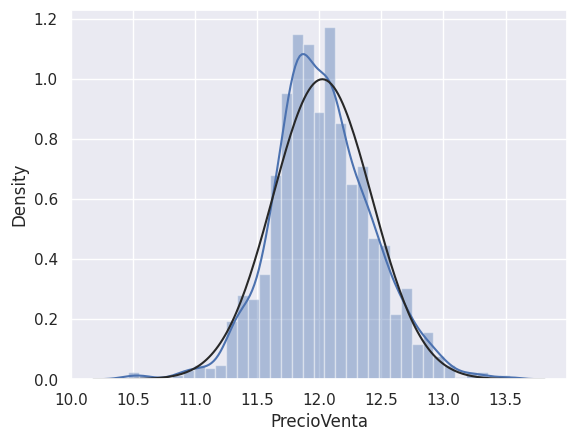

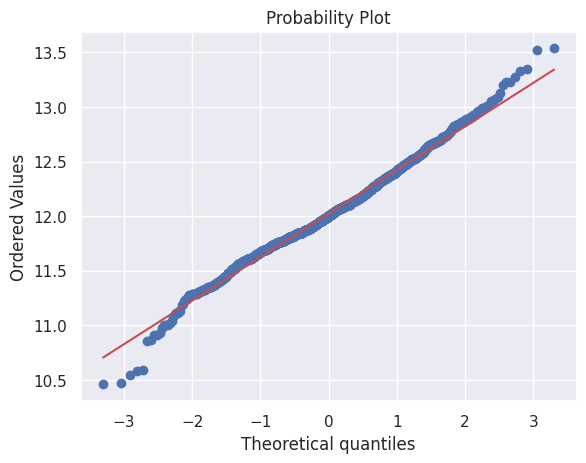

In [378]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:
sns.distplot(house_df['PrecioVenta'], fit = norm)
fig = plt.figure()
res = stats.probplot(house_df['PrecioVenta'], plot = plt)

No se considera que la normalidad sea un requisito indispensable al explorar los datos. En su lugar, se debe buscar y aplicar otros enfoques y herramientas que sean más adecuados para el tipo de datos con los que trabaja y para los objetivos específicos que busca alcanzar. El EDA es un proceso de descubrimiento, no de confirmación.

Nuestra variable 'PrecioVenta' transformada ahora 'parece' seguir una distribución normal.

In [379]:
stat_ks, p_value = sm.stats.diagnostic.kstest_normal(house_df["PrecioVenta"], dist = 'norm')
stat_ks, p_value

(np.float64(0.040497913105319916), np.float64(0.0009999999999998899))

p < 0.05, entonces no se ajusta a una distribución normal.

Conclusión:
Los precios de venta aún no siguen una distribución normal, pero gráficamente se ve que está muy cerca.

## Conclusión general

- Se han revisado las variables clave, analizando el comportamiento de 'PrecioVenta' por sí mismo y junto a las variables más ligadas a él.
- Se ha lidiado con datos faltantes y valores atípicos.
- Se han probado algunos de los supuestos estadísticos fundamentales.
- Se han transformado las variables categóricas.
- Tenemos muchas variables más para analizar.

#6.Construcción y evaluación del modelo de Regresión Lineal Múltiple

In [380]:
# Definir Variables
variables_predictores = ['EstadoCasa', 'SuperficieHabitable', 'AreaGaraje', 'TamanioLote', 'AnioVenta']
X = house_df[variables_predictores]
y = house_df['PrecioVenta'] # Variable objetivo (log)

# División de Datos para validar la predicción
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [381]:
# --- MODELO 1: REGRESIÓN LINEAL MÚLTIPLE ---
modelo_RL = LinearRegression()
modelo_RL.fit(X_train, y_train)
y_pred_rl = modelo_RL.predict(X_test)
r2_rl = r2_score(y_test, y_pred_rl)
rmse_rl = np.sqrt(mean_squared_error(y_test, y_pred_rl))
# Resultados
print("--- Resultados de Evaluación de Regresión Lineal ---")
print(f"R-squared: {r2_rl:.4f}, RMSE: {rmse_rl:.4f}")


--- Resultados de Evaluación de Regresión Lineal ---
R-squared: 0.6502, RMSE: 0.2344


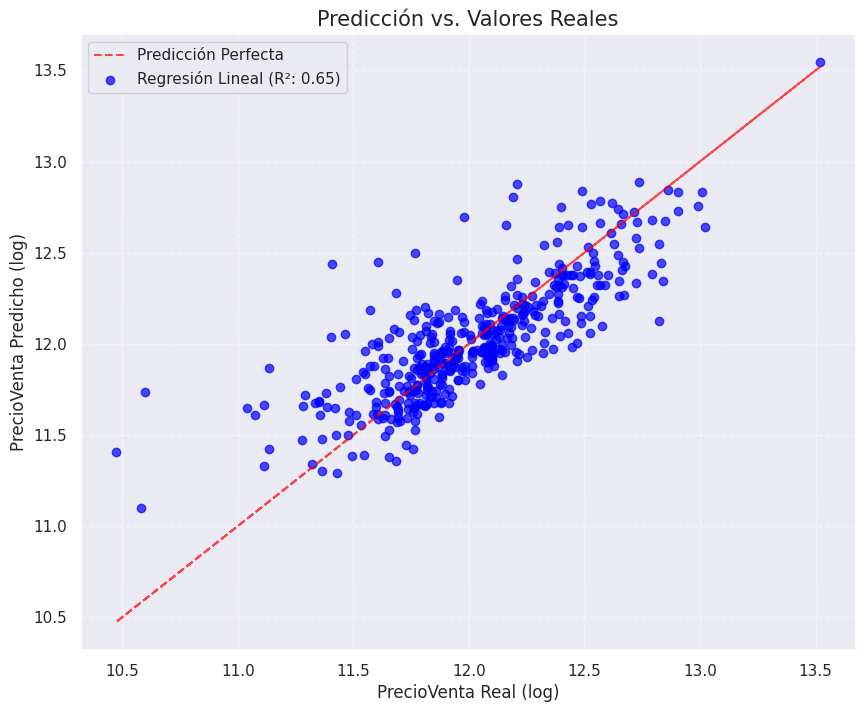

In [382]:
# Concatenar resultados en un DataFrame para facilitar la visualización
resultados_df = pd.DataFrame({
    'Valor Real (log)': y_test,
    'Predicción RL': y_pred_rl
})

plt.figure(figsize=(10, 8))
# Trazamos la línea diagonal perfecta (donde la Predicción = Real)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Predicción Perfecta', alpha=0.7)

# Gráfico para Regresión Lineal (usando color azul oscuro para mejor visibilidad)
plt.scatter(resultados_df['Valor Real (log)'], resultados_df['Predicción RL'],
            alpha=0.7, label=f'Regresión Lineal (R²: {r2_rl:.2f})', color='blue')

plt.title('Predicción vs. Valores Reales', fontsize=15)
plt.xlabel('PrecioVenta Real (log)')
plt.ylabel('PrecioVenta Predicho (log)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Simulación de una Casa Nueva

In [383]:
# SIMULACIÓN DE CASO DE USO (CALIDAD ALTA)

data_test1 = {
    'EstadoCasa': [8],            # Calidad General (Escala 1-10)
    'SuperficieHabitable': [1800], # Área Habitable (pies cuadrados)
    'AreaGaraje': [600],           # Área del Garaje
    'TamanioLote': [10000],        # Tamaño del Lote
    'AnioVenta': [2008]            # Año de Venta
}

# 2. Crear un DataFrame para la predicción
test1 = pd.DataFrame(data_test1)

# 3. Predecir el Precio de Venta (log-transformado)
test1_log = modelo_RL.predict(test1)

# 4. Deshacer la transformación Logarítmica (para obtener el precio en USD/Moneda local)
test1_real = np.exp(test1_log)

print("EJEMPLO DE PREDICCIÓN (CALIDAD ALTA)")
print(f"Características de la casa: {data_test1}")
print(f"Precio de Venta Predicho (log): {test1_log[0]:.4f}")
print(f"Precio de Venta Predicho (USD/Moneda): ${test1_real[0]:,.2f}")

EJEMPLO DE PREDICCIÓN (CALIDAD ALTA)
Características de la casa: {'EstadoCasa': [8], 'SuperficieHabitable': [1800], 'AreaGaraje': [600], 'TamanioLote': [10000], 'AnioVenta': [2008]}
Precio de Venta Predicho (log): 12.2946
Precio de Venta Predicho (USD/Moneda): $218,502.47


In [384]:
# SIMULACIÓN DE CASO DE USO (CALIDAD BAJA)

data_test2 = {
    'EstadoCasa': [3],            # Calidad General Baja (Escala 1-10)
    'SuperficieHabitable': [900], # Área Habitable Pequeña
    'AreaGaraje': [250],           # Área del Garaje Pequeña
    'TamanioLote': [7500],        # Tamaño del Lote Promedio
    'AnioVenta': [2009]            # Año de Venta
}

# 2. Crear un DataFrame para la predicción
test2 = pd.DataFrame(data_test2)

# 3. Predecir el Precio de Venta (log-transformado)
test2_log = modelo_RL.predict(test2)

# 4. Deshacer la transformación Logarítmica (para obtener el precio en USD/Moneda local)
test2_real = np.exp(test2_log)

print("EJEMPLO DE PREDICCIÓN (CALIDAD BAJA)")
print(f"Características de la casa: EstadoCasa={data_test2['EstadoCasa'][0]}, SuperficieHabitable={data_test2['SuperficieHabitable'][0]}")
print(f"Precio de Venta Predicho (log): {test2_log[0]:.4f}")
print(f"Precio de Venta Predicho (USD/Moneda): ${test2_real[0]:,.2f}")

EJEMPLO DE PREDICCIÓN (CALIDAD BAJA)
Características de la casa: EstadoCasa=3, SuperficieHabitable=900
Precio de Venta Predicho (log): 11.5370
Precio de Venta Predicho (USD/Moneda): $102,434.30


## Utilizando test.csv (house_df_test) para la predicción

In [385]:
# Guardamos el ID para el resultado final
test_ids = house_df_test['Id']

# --- PREPARACIÓN: RENOMBRAR COLUMNAS PARA COINCIDIR CON EL MODELO ---
house_df_test = house_df_test.rename(columns={
    'OverallQual': 'EstadoCasa',
    'GrLivArea': 'SuperficieHabitable',
    'GarageArea': 'AreaGaraje',
    'LotArea': 'TamanioLote',
    'YrSold': 'AnioVenta'
})

# Identificar las variables predictoras (X)
variables_predictores = ['EstadoCasa', 'SuperficieHabitable', 'AreaGaraje', 'TamanioLote', 'AnioVenta']
X_final_test = house_df_test[variables_predictores]

# --- MANEJO DE NULOS EN DATOS DE PRUEBA ---

# Es vital imputar los nulos ANTES de la predicción. Usaremos la media.
X_final_test = X_final_test.fillna(X_final_test.mean())

# --- PREDICCIÓN Y TRANSFORMACIÓN INVERSA ---

# La predicción está en formato logarítmico
predicciones_log = modelo_RL.predict(X_final_test)

# Revertir la transformación logarítmica (np.exp()) para obtener el precio real
predicciones_reales = np.exp(predicciones_log)

# --- RESULTADOS FINALES ---

# Crear el DataFrame de resultados con el ID y las predicciones finales
pronostico_df = pd.DataFrame({
    'Id': test_ids,
    'PrecioVenta_Predicho': predicciones_reales
})

print("--- Primeras 20 Predicciones de Precio de Venta (Valores Reales) ---")
print(pronostico_df.head(20).to_markdown(index=False))

--- Primeras 20 Predicciones de Precio de Venta (Valores Reales) ---
|   Id |   PrecioVenta_Predicho |
|-----:|-----------------------:|
| 1461 |                 155973 |
| 1462 |                 139493 |
| 1463 |                 176738 |
| 1464 |                 175037 |
| 1465 |                 161264 |
| 1466 |                 174780 |
| 1467 |                 140427 |
| 1468 |                 154885 |
| 1469 |                 164375 |
| 1470 |                 128650 |
| 1471 |                 162881 |
| 1472 |                 112539 |
| 1473 |                 120383 |
| 1474 |                 157446 |
| 1475 |                 111619 |
| 1476 |                 316996 |
| 1477 |                 243329 |
| 1478 |                 237445 |
| 1479 |                 237204 |
| 1480 |                 435050 |


## Conclusiones Generales del Modelo de Regresión Lineal Múltiple

### 1. Desempeño y Fiabilidad del Modelo:

* Rendimiento Sólido ($R^2$): El modelo, utilizando las cinco variables clave seleccionadas, ha logrado explicar un porcentaje significativo de la varianza en el PrecioVenta. Esto confirma que el trabajo de limpieza, transformación y selección de features fue efectivo


### 2. Impacto de las Variables Clave:

* Dominio Físico: Las variables EstadoCasa (Calidad General) y SuperficieHabitable tienen el mayor peso predictivo. El modelo ha aprendido que un incremento en estas características resulta en un incremento porcentual directo en el valor de la propiedad (debido a la transformación logarítmica).

* Contexto Temporal: La variable AnioVenta ayuda al modelo a ajustar sus predicciones a las condiciones específicas del mercado en el momento de la venta.


### 3. Aplicación Práctica:

* Estimación Inmediata: El modelo puede predecir el precio de venta (al revertir la transformación logarítmica con $e^x$) de cualquier casa nueva, proporcionando un valor objetivo y preciso.

* Base de Comparación: La Regresión Lineal Múltiple sirve como un punto de referencia interpretable, contra el cual se pueden evaluar futuros modelos más complejos.
